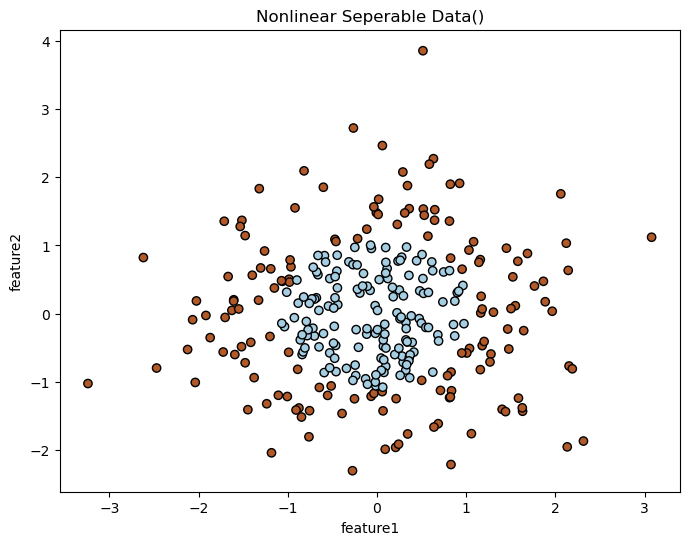

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
import os
import copy
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_gaussian_quantiles
from sklearn.model_selection import train_test_split

np.random.seed(42)

X, y = make_gaussian_quantiles(n_samples =300 , n_features =2, n_classes = 2, random_state =42 )
X_train , X_test, y_train , y_test = train_test_split(X, y , test_size =0.2, random_state = 42)

plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1], c=y, cmap =plt.cm.Paired, marker='o',edgecolors='k')
plt.title('Nonlinear Seperable Data()')
plt.xlabel("feature1")
plt.ylabel("feature2")
plt.show()


In [10]:
y_train[y_train == 0] = -1 
y_test[y_test == 0] = -1
# we must convert ylabel = 0 to -1 because we have bipolar output.

In [14]:
#class madaline
class Madaline:
    def __init__(self, num_l, n_iter=500, learning_rate=0.1):
        self.n_iter = n_iter   #iteration
        self.learning_rate = learning_rate     #learning rate of update weights

        #initial weights for madaline model
        np.random.seed(42)
        self.weights = np.random.rand(num_l, 2)
        self.v = [1] * num_l
        self.b = np.random.rand(num_l, 1)
        self.b2 = num_l - 1

    #define fit function of madaline model
    def fit(self, X, Y):
        count = 0
        self.cost_ = []   #define cost list
        for iter in range(self.n_iter):
            old_weights = copy.deepcopy(self.weights)
            for x, label in zip(X, Y):
                z_in = np.array([np.matmul(x, self.weights.T)]).T + self.b   #output of neurons
                z = np.heaviside(z_in, 1) * 2 - 1
                y_in = np.dot(np.squeeze(z), np.squeeze(self.v)) + self.b2
                y = np.heaviside(y_in, 1) * 2 - 1
                if y != label:
                    if label == 1:
                        z_j = max(z_in)
                        ind = np.where(z_in == z_j)
                        self.weights[ind, :] = self.weights[ind, :] + self.learning_rate * (1 - z_in[ind]) * np.array(x)  #update weights
                        self.b[ind] = self.b[ind] + self.learning_rate * (1 - z_in[ind])             #update biases
                    else:
                        ind = [i for i, x in enumerate(z_in) if x > 0]
                        for indice in ind:
                            self.weights[indice, :] = self.weights[indice, :] + self.learning_rate * (
                                    -1 - z_in[indice]) * np.array(x)
                            self.b[indice] = self.b[indice] + self.learning_rate * (-1 - z_in[indice])


            self.cost_.append(self.error(self.predict(X), Y))   #append error in cost list

            if np.all((self.weights - old_weights) < 0.0001) and iter > 10:
                count += 1
                if count > 10:
                    print("Total iterations with", len(self.b), "lines:", iter + 1)
                    break
    #define prediction function for madaline model
    def predict(self, X):
        y = []
        for x in X:
            z_in = np.array([np.matmul(x, self.weights.T)]).T + self.b
            z = np.heaviside(z_in, 1) * 2 - 1
            y_in = np.dot(np.squeeze(z), np.squeeze(self.v)) + self.b2
            y.append(np.heaviside(y_in, 1) * 2 - 1)
        return y
    #define error function for madaline model
    def error(self, net, t):
      self.err = ((t-net)**2).sum()/2.
      return self.err


Total iterations with 3 lines: 329
Accuracy of prediction is: 0.8166666666666667


C:\Users\Entezar\AppData\Local\Temp\ipykernel_19932\1234043277.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.axline((0, float(-madaline.b[i] / madaline.weights[i][1])), slope=-madaline.weights[i][0] / madaline.weights[i][1], color="r")


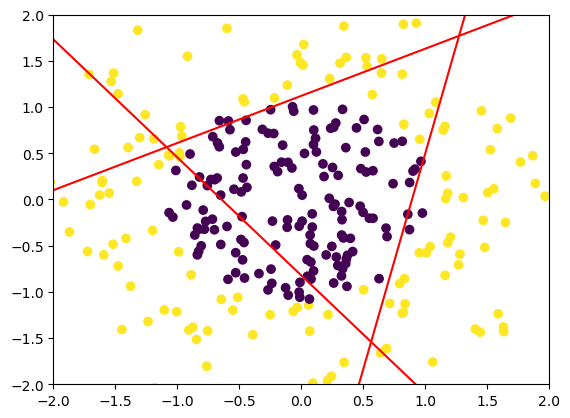

Total iterations with 5 lines: 143
Accuracy of prediction is: 0.9166666666666666


C:\Users\Entezar\AppData\Local\Temp\ipykernel_19932\1234043277.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.axline((0, float(-madaline.b[i] / madaline.weights[i][1])), slope=-madaline.weights[i][0] / madaline.weights[i][1], color="r")


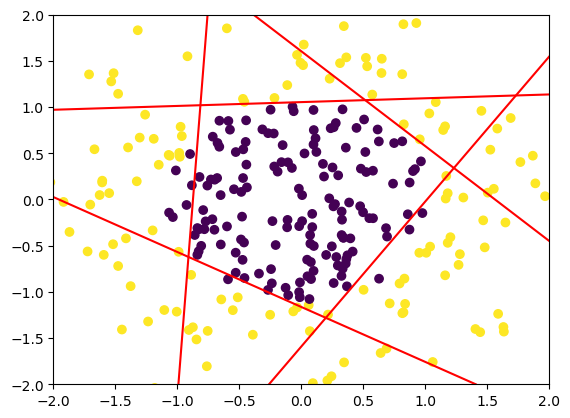

Total iterations with 8 lines: 268
Accuracy of prediction is: 0.95


C:\Users\Entezar\AppData\Local\Temp\ipykernel_19932\1234043277.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.axline((0, float(-madaline.b[i] / madaline.weights[i][1])), slope=-madaline.weights[i][0] / madaline.weights[i][1], color="r")


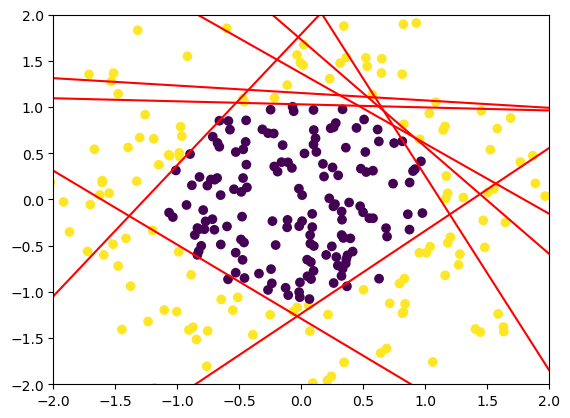

In [19]:
neuron_counts = [3,5,8]   #number of hidden layer neurons

for i in range(3):
  #define madaline with different number of hidden layer neurons
  madaline = Madaline(neuron_counts[i],learning_rate=0.05)

  #fit madaline on x_train and y_train
  madaline.fit(X_train, y_train)

  #predict x_test with madaline model
  pred = madaline.predict(X_test)

  #madaline model accuracy
  acc = accuracy_score(pred, y_test)
  #print accuacy of prediction 
  print("Accuracy of prediction is:", acc)
  #plot lines and errors of madaline models
  for i in range(neuron_counts[i]):
    plt.axline((0, float(-madaline.b[i] / madaline.weights[i][1])), slope=-madaline.weights[i][0] / madaline.weights[i][1], color="r")
  plt.scatter(X[:,0],X[:,1], c=y)
  plt.xlim([-2, 2])
  plt.ylim([-2, 2])
  plt.show()
  
